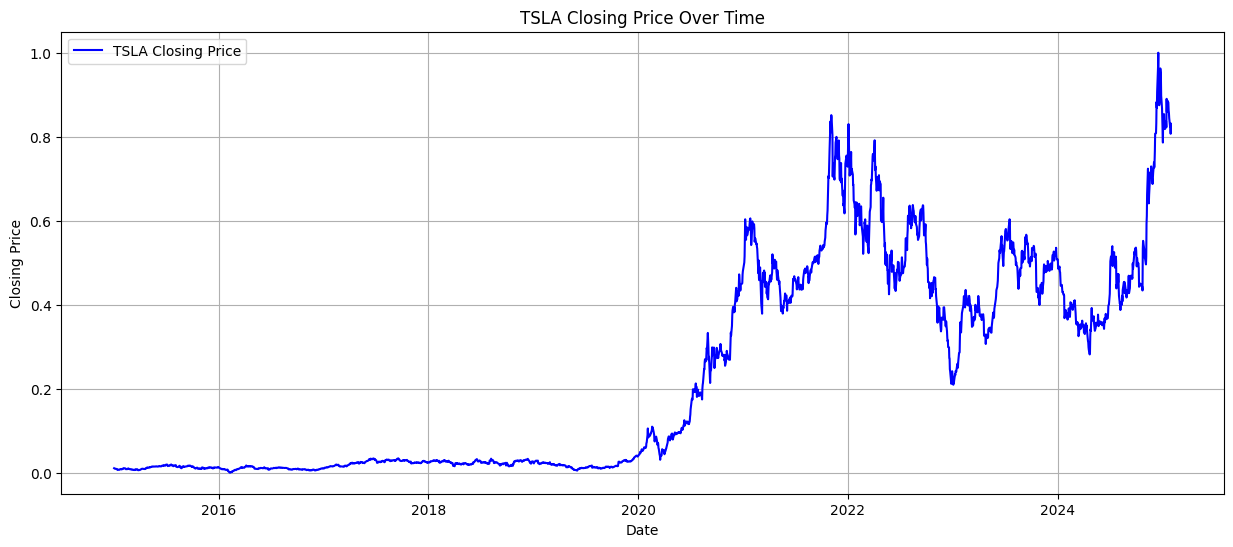

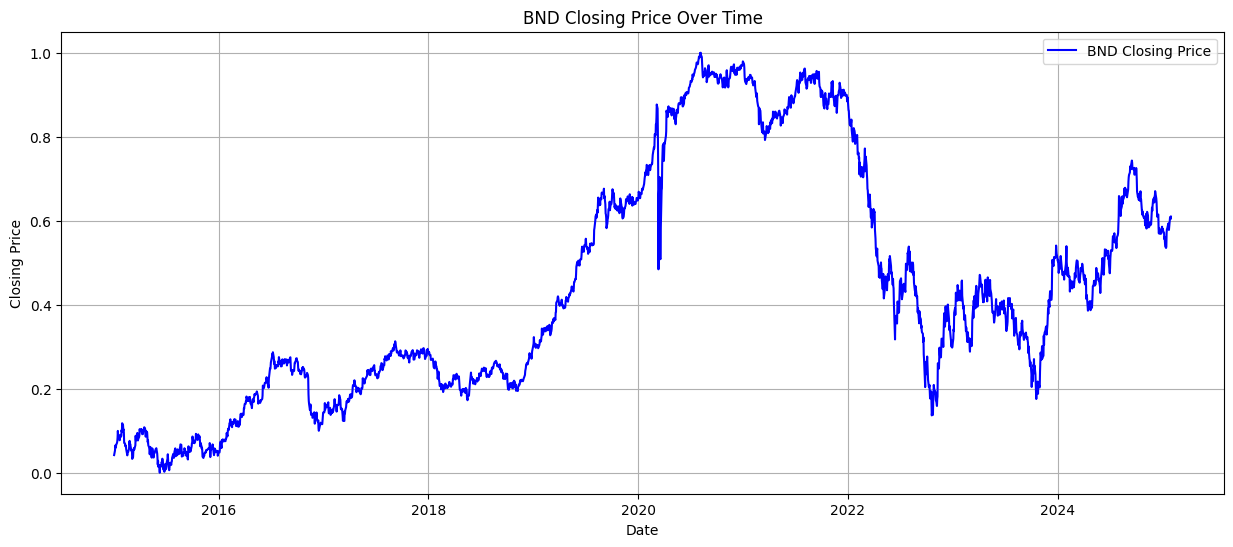

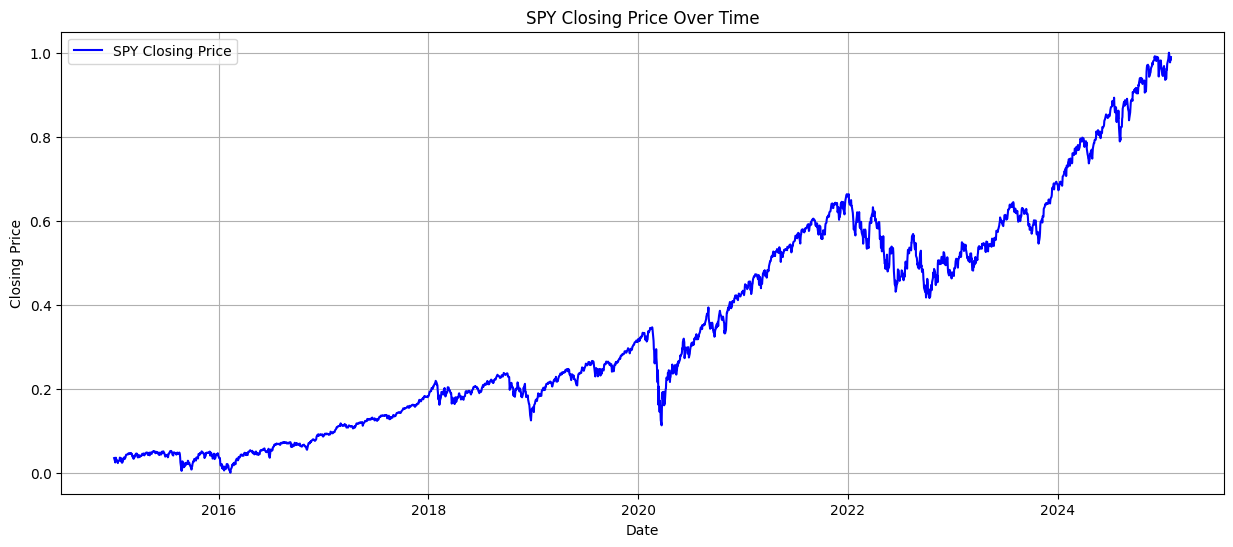

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

def visualize_closing_price(df, asset_name):
    """Visualizes the closing price of an asset over time."""
    close_col = f"{asset_name}_Close"
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df[close_col], label=f"{asset_name} Closing Price", color='blue')
    plt.title(f"{asset_name} Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize closing prices for TSLA, BND, and SPY
visualize_closing_price(df, "TSLA")
visualize_closing_price(df, "BND")
visualize_closing_price(df, "SPY")

## Closing Price Trends

The closing prices of the three assets over time reveal distinct trends:

* **TSLA:** Shows a strong upward trend with high volatility, characteristic of a high-growth stock.

* **BND:** Exhibits relatively stable price movements with lower volatility, typical of a bond ETF. There's an initial upward trend followed by a decline and a recent partial recovery.

* **SPY:** Demonstrates a consistent upward trend with moderate volatility, reflecting the overall growth of the U.S. stock market.

These trends highlight the different risk and return profiles of the assets.

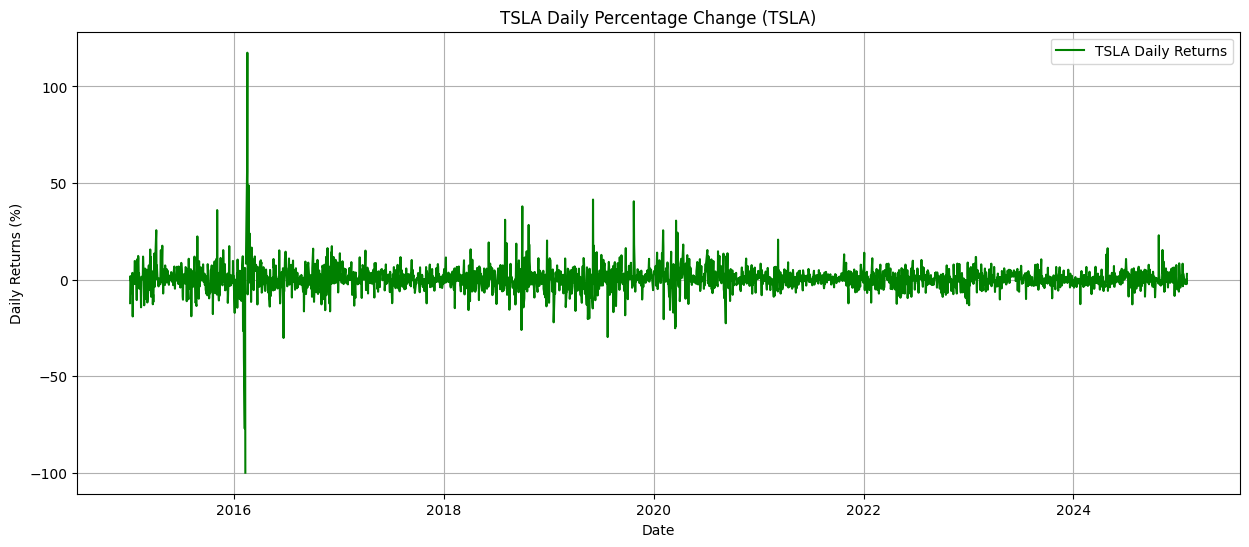

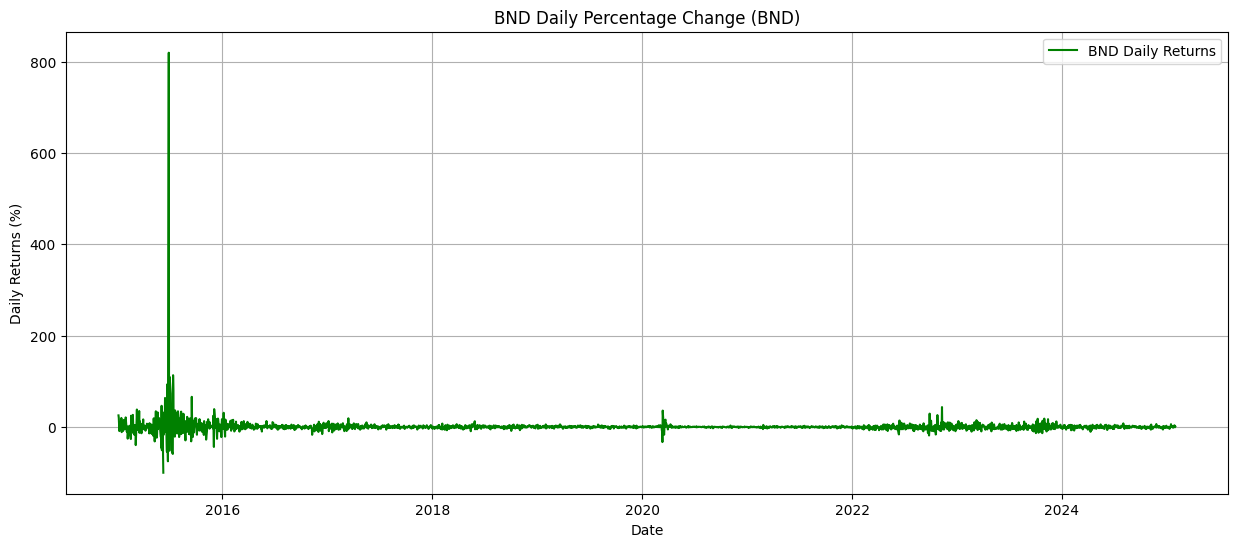

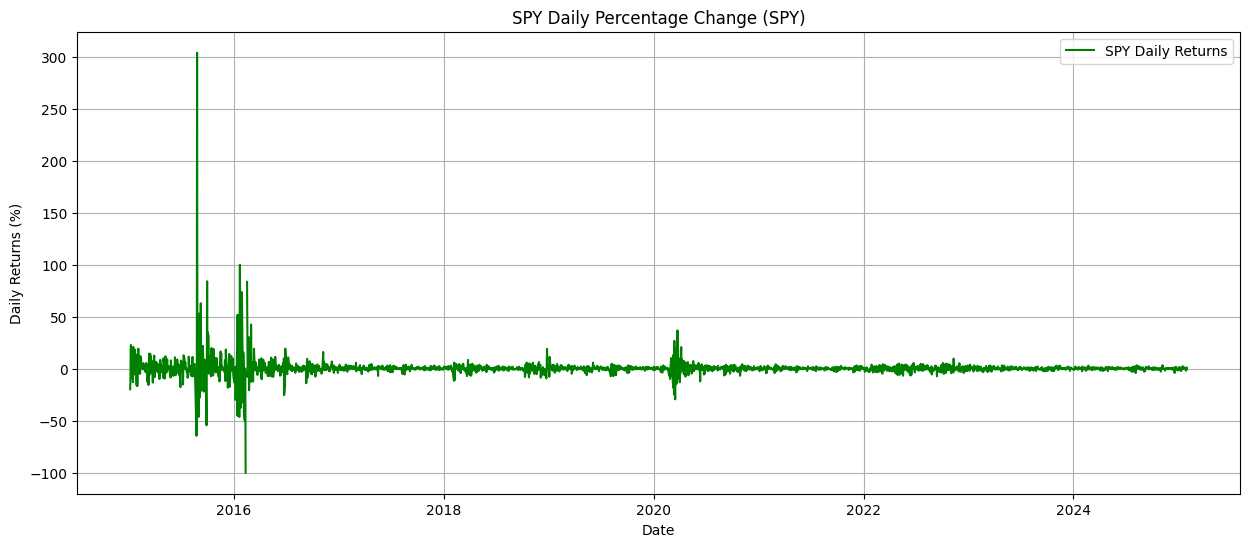

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

def calculate_daily_returns(df, asset_name):
    """Calculates and plots the daily percentage change of an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100  # Calculate percentage change and multiply by 100
    return df

def visualize_daily_returns(df, asset_name):
    """Visualizes the daily percentage change of an asset."""
    returns_col = f"{asset_name}_Returns"
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df[returns_col], label=f"{asset_name} Daily Returns", color='green')
    plt.title(f"{asset_name} Daily Percentage Change ({asset_name})")
    plt.xlabel("Date")
    plt.ylabel("Daily Returns (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate and visualize daily returns for TSLA, BND, and SPY
df = calculate_daily_returns(df, "TSLA")
visualize_daily_returns(df, "TSLA")

df = calculate_daily_returns(df, "BND")
visualize_daily_returns(df, "BND")

df = calculate_daily_returns(df, "SPY")
visualize_daily_returns(df, "SPY")

## Daily Percentage Change Analysis

The daily percentage change plots provide insights into the volatility of each asset:

* **TSLA:**
    * Exhibits high volatility with significant fluctuations in daily returns.
    * Reflects the high-risk, high-reward nature of the stock.
    * Shows sensitivity to news and market sentiment.

* **BND:**
    * Demonstrates low volatility, with most daily returns clustered close to zero.
    * Highlights the stability of a bond ETF.
    * Shows a few outliers, which may require further investigation.

* **SPY:**
    * Shows moderate volatility, with fluctuations between TSLA and BND.
    * Reflects the overall market sentiment and economic conditions.
    * Displays increased volatility during specific events, such as the 2020 pandemic.

These plots illustrate the varying risk profiles of the assets, with TSLA being the most volatile, BND being the most stable, and SPY representing a balance between the two.

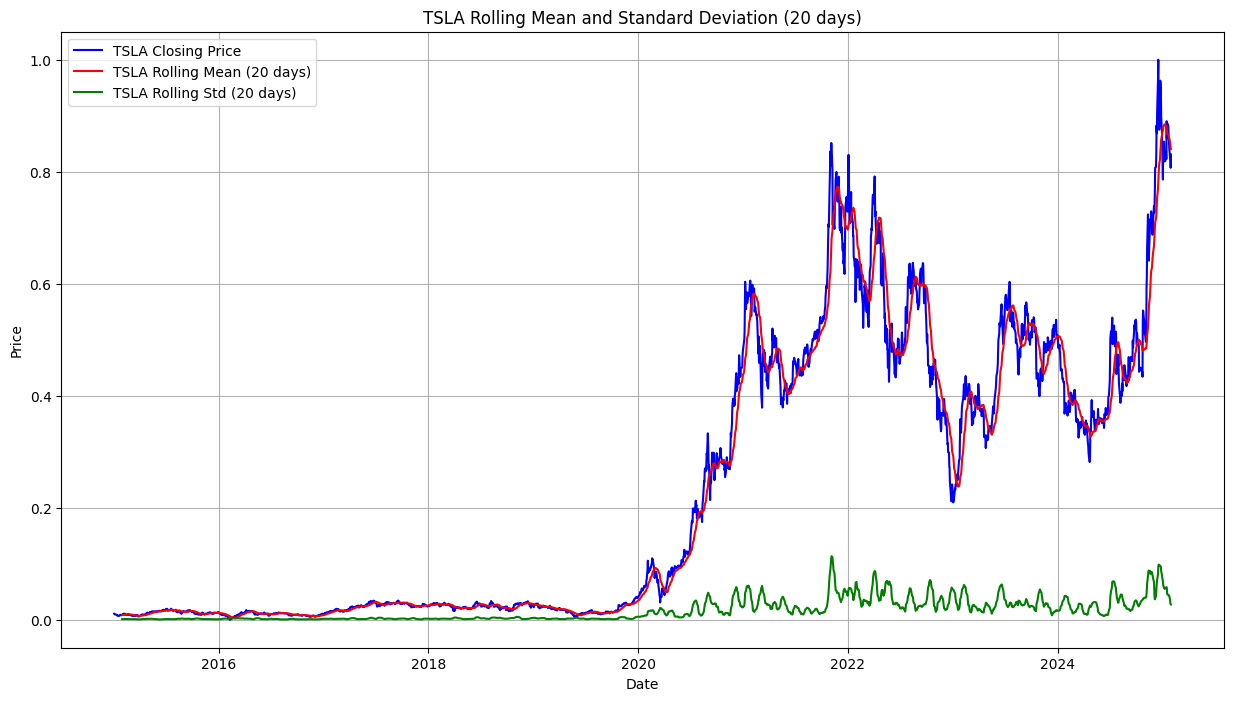

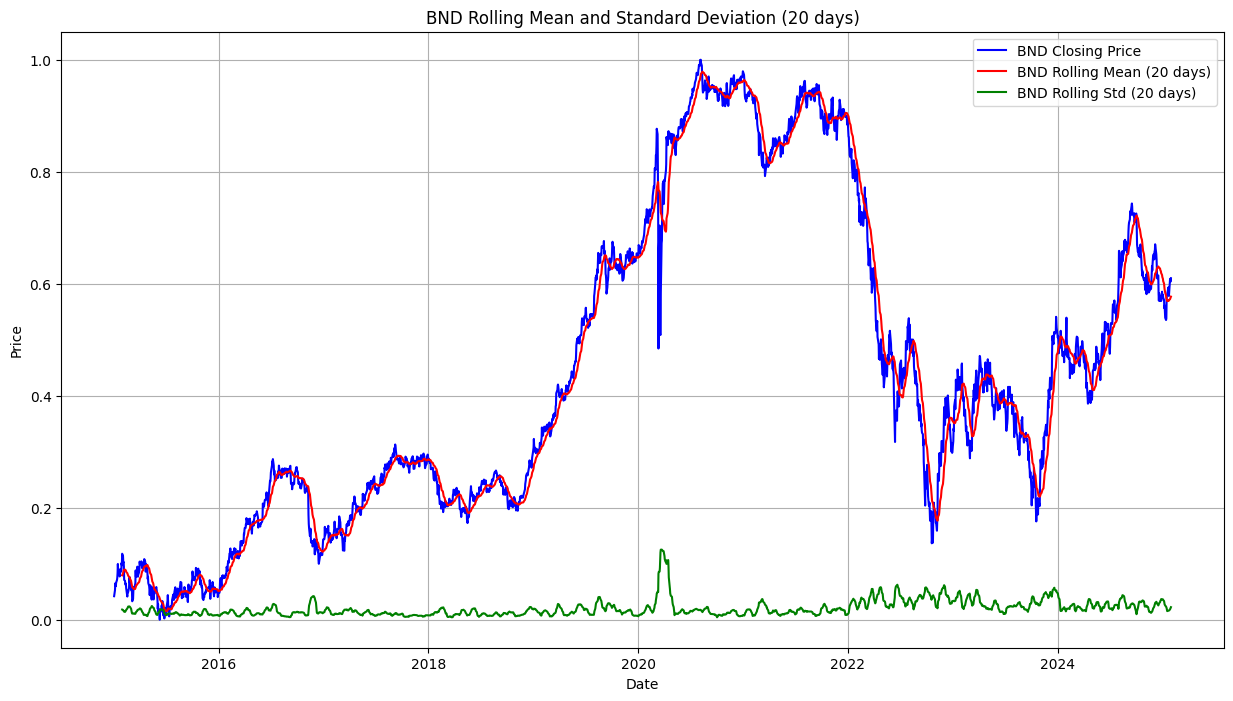

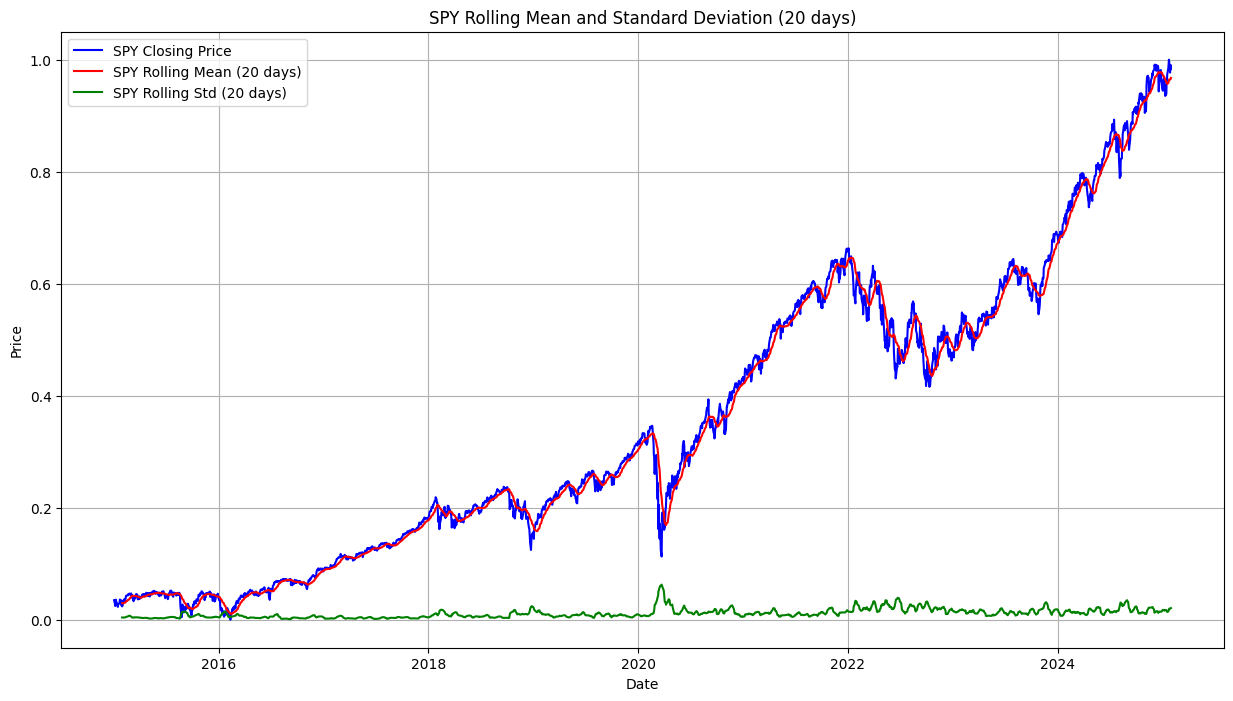

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

def calculate_rolling_stats(df, asset_name, window=20):
    """Calculates rolling mean and standard deviation for an asset."""
    close_col = f"{asset_name}_Close"
    rolling_mean = df[close_col].rolling(window=window).mean()
    rolling_std = df[close_col].rolling(window=window).std()
    return rolling_mean, rolling_std

def visualize_rolling_stats(df, asset_name, window=20):
    """Visualizes rolling mean and standard deviation for an asset."""
    close_col = f"{asset_name}_Close"
    rolling_mean, rolling_std = calculate_rolling_stats(df, asset_name, window)

    plt.figure(figsize=(15, 8))
    plt.plot(df.index, df[close_col], label=f"{asset_name} Closing Price", color='blue')
    plt.plot(df.index, rolling_mean, label=f"{asset_name} Rolling Mean ({window} days)", color='red')
    plt.plot(df.index, rolling_std, label=f"{asset_name} Rolling Std ({window} days)", color='green')
    plt.title(f"{asset_name} Rolling Mean and Standard Deviation ({window} days)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate and visualize rolling statistics for TSLA, BND, and SPY
visualize_rolling_stats(df, "TSLA")
visualize_rolling_stats(df, "BND")
visualize_rolling_stats(df, "SPY")

## Rolling Statistics Comparison

The rolling means and standard deviations provide insights into the volatility trends of the three assets:

* **TSLA:**
    * The rolling mean confirms the upward trend, while the rolling standard deviation highlights periods of high volatility.
    * Volatility tends to cluster and is higher during periods of high stock prices.

* **BND:**
    * The rolling mean smoothly tracks the overall trend, with lower fluctuations compared to TSLA.
    * The rolling standard deviation is generally low, confirming BND's stability.
    * A spike in volatility is observed around 2020, likely due to a rare market event.

* **SPY:**
    * The rolling mean confirms the consistent upward trend of the SPY, reflecting the long-term growth of the U.S. stock market.
    * The rolling standard deviation shows moderate volatility, with spikes around significant events like the 2020 pandemic.

These plots illustrate the varying volatility patterns of the assets, with TSLA exhibiting high volatility, BND showing low volatility, and SPY representing a balance between the two. The rolling statistics help assess risk and identify short-term trends.

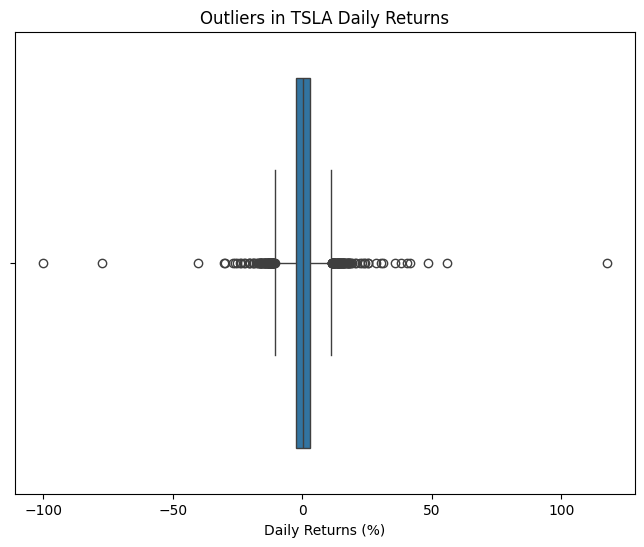

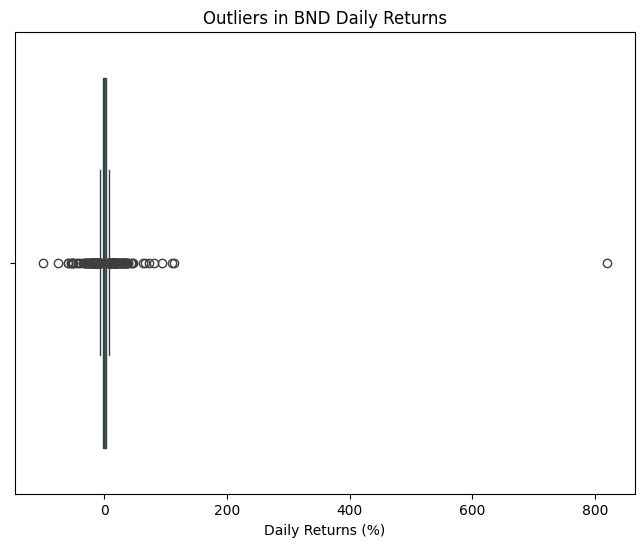

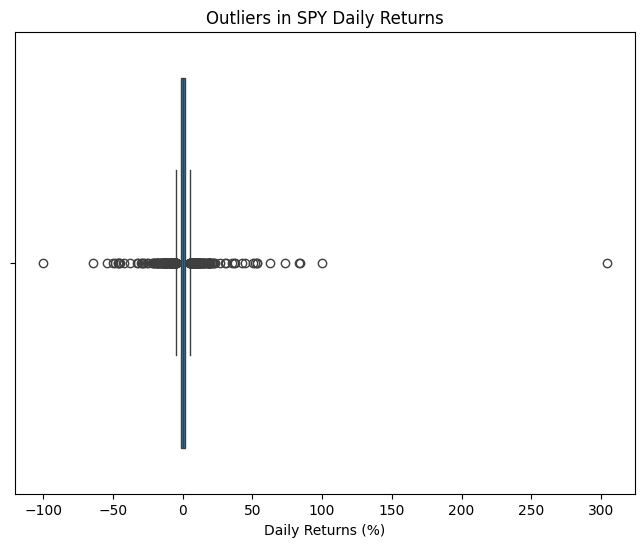

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily returns (if not already calculated)
def calculate_daily_returns(df, asset_name):
    """Calculates daily returns for an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100
    return df

df = calculate_daily_returns(df, "TSLA")
df = calculate_daily_returns(df, "BND")
df = calculate_daily_returns(df, "SPY")

def visualize_outliers(df, asset_name):
    """Visualizes outliers in daily returns using box plots."""
    returns_col = f"{asset_name}_Returns"
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[returns_col])
    plt.title(f"Outliers in {asset_name} Daily Returns")
    plt.xlabel("Daily Returns (%)")
    plt.show()

# Visualize outliers for TSLA, BND, and SPY
visualize_outliers(df, "TSLA")
visualize_outliers(df, "BND")
visualize_outliers(df, "SPY")

## Outlier Analysis and Next Steps

The box plots of daily returns reveal the presence of outliers and provide insights into the volatility of each asset:

* **TSLA:**
    * Shows significant outliers, confirming high volatility and the potential for large daily gains or losses.

* **BND:**
    * Exhibits one extreme outlier, likely a data anomaly, and a few minor outliers.
    * Confirms low volatility and stability, except for the potential data issue.

* **SPY:**
    * Shows moderate outliers, reflecting market volatility and the impact of significant events.
    * The lower number of outliers compared to TSLA highlights the diversification effect.

**Next Steps based on Outlier Analysis:**

* **TSLA:**
    * Investigate the dates and context of the extreme outliers to understand the underlying causes.
    * Consider using robust statistical methods or models less sensitive to outliers when analyzing or forecasting TSLA's price.

* **BND:**
    * **Crucial:** Investigate the extreme outlier to determine if it's a data error or a genuine market event. If it's an error, correct it in the dataset.
    * Consider removing or adjusting the extreme outlier before further analysis or modeling, as it can significantly skew results.

* **SPY:**
    * Analyze the moderate outliers to understand their relationship to market events and economic conditions.
    * Consider using robust statistical methods if the outliers are deemed to have a significant impact on the analysis.

The outlier analysis helps identify potential data issues and guides the choice of appropriate methods for further analysis and modeling.


TSLA Outlier Dates:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

TSLA Median Return: 0.1719658969096982
TSLA IQR: 5.484256845442892

BND Extreme Outlier Date:
DatetimeIndex(['2015-06-11', '2015-06-29'], dtype='datetime64[ns]', name='Date', freq=None)

BND Outlier Removed.

SPY Outlier Dates:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

SPY Median Return: 0.1612843241474149
SPY IQR: 2.4398211459348396


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


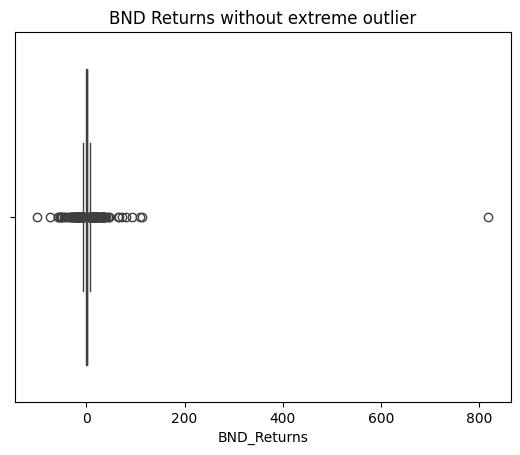

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily returns (if not already calculated)
def calculate_daily_returns(df, asset_name):
    """Calculates daily returns for an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100
    return df

df = calculate_daily_returns(df, "TSLA")
df = calculate_daily_returns(df, "BND")
df = calculate_daily_returns(df, "SPY")

# Step 1: Identify and Investigate Outliers for TSLA
def investigate_tsla_outliers(df):
    """Identifies and investigates outliers for TSLA."""
    returns_col = "TSLA_Returns"
    # Identify outliers using a threshold (e.g., 3 standard deviations)
    threshold = 3 * df[returns_col].std()
    outliers = df[abs(df[returns_col]) > threshold]
    print("\nTSLA Outlier Dates:")
    print(outliers.index)
    # Research news and events around those dates
    # (This step requires manual research and is not included in the code)
    # Example:
    # for date in outliers.index:
    #     print(f"Research news for TSLA on {date}")

investigate_tsla_outliers(df)

# Step 2: Consider Robust Methods for TSLA (Example)
def robust_stats_tsla(df):
    """Calculates robust statistics for TSLA."""
    returns_col = "TSLA_Returns"
    median_return = df[returns_col].median()
    iqr = df[returns_col].quantile(0.75) - df[returns_col].quantile(0.25)
    print(f"\nTSLA Median Return: {median_return}")
    print(f"TSLA IQR: {iqr}")

robust_stats_tsla(df)

# Step 3: Investigate the Extreme Outlier for BND
def investigate_bnd_outlier(df):
    """Investigates the extreme outlier for BND."""
    returns_col = "BND_Returns"
    # Identify the extreme outlier (e.g., using a high threshold)
    threshold = 500  # Adjust as needed
    outlier = df[abs(df[returns_col]) > threshold]
    print("\nBND Extreme Outlier Date:")
    print(outlier.index)
    # Verify data source and accuracy
    # (This step requires manual investigation)

investigate_bnd_outlier(df)

# Step 4: Consider Removing or Adjusting BND Outlier (Example)
def handle_bnd_outlier(df):
    """Handles the BND outlier by removing or adjusting."""
    returns_col = "BND_Returns"
    threshold = 500
    outlier_date = df[abs(df[returns_col]) > threshold].index[0]
    # Remove the outlier
    df_no_outlier = df.drop(outlier_date)
    print("\nBND Outlier Removed.")
    # Or adjust the outlier (e.g., replace with median)
    # df.loc[outlier_date, returns_col] = df[returns_col].median()
    # print("\nBND Outlier Adjusted.")
    return df_no_outlier

df = handle_bnd_outlier(df)

# Step 5: Analyze Moderate Outliers for SPY
def analyze_spy_outliers(df):
    """Analyzes moderate outliers for SPY."""
    returns_col = "SPY_Returns"
    threshold = 3 * df[returns_col].std()
    outliers = df[abs(df[returns_col]) > threshold]
    print("\nSPY Outlier Dates:")
    print(outliers.index)
    # Research market events around those dates
    # (This step requires manual research)

analyze_spy_outliers(df)

# Step 6: Consider Robust Methods for SPY (Example)
def robust_stats_spy(df):
    """Calculates robust statistics for SPY."""
    returns_col = "SPY_Returns"
    median_return = df[returns_col].median()
    iqr = df[returns_col].quantile(0.75) - df[returns_col].quantile(0.25)
    print(f"\nSPY Median Return: {median_return}")
    print(f"SPY IQR: {iqr}")

robust_stats_spy(df)

# Step 7: Visualize the updated BND boxplot.
sns.boxplot(x=df['BND_Returns'])
plt.title('BND Returns without extreme outlier')
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily returns (if not already calculated)
def calculate_daily_returns(df, asset_name):
    """Calculates daily returns for an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100
    return df

df = calculate_daily_returns(df, "TSLA")
df = calculate_daily_returns(df, "BND")
df = calculate_daily_returns(df, "SPY")

# Refined TSLA Outlier Detection
def investigate_tsla_outliers_refined(df, threshold_std=2.5):
    """Identifies and investigates outliers for TSLA with adjusted threshold."""
    returns_col = "TSLA_Returns"
    threshold = threshold_std * df[returns_col].std()
    outliers = df[abs(df[returns_col]) > threshold]
    print("\nRefined TSLA Outlier Dates:")
    print(outliers.index)
    # Research news and events around those dates

investigate_tsla_outliers_refined(df)

# Refined SPY Outlier Detection
def analyze_spy_outliers_refined(df, threshold_std=2.5):
    """Analyzes moderate outliers for SPY with adjusted threshold."""
    returns_col = "SPY_Returns"
    threshold = threshold_std * df[returns_col].std()
    outliers = df[abs(df[returns_col]) > threshold]
    print("\nRefined SPY Outlier Dates:")
    print(outliers.index)
    # Research market events around those dates

analyze_spy_outliers_refined(df)


Refined TSLA Outlier Dates:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

Refined SPY Outlier Dates:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



Refined TSLA Outlier Dates (Threshold 2):
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

Refined SPY Outlier Dates (Threshold 2):
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


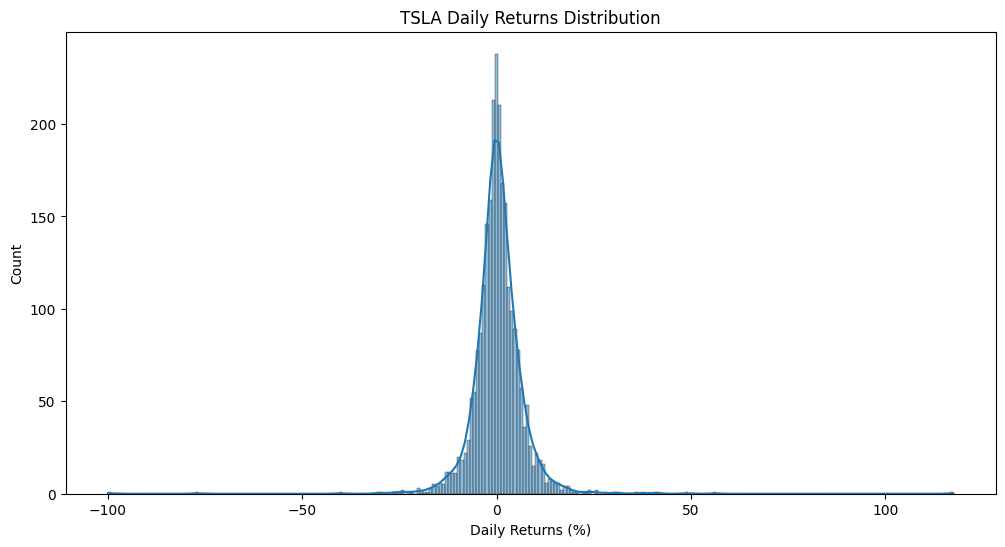

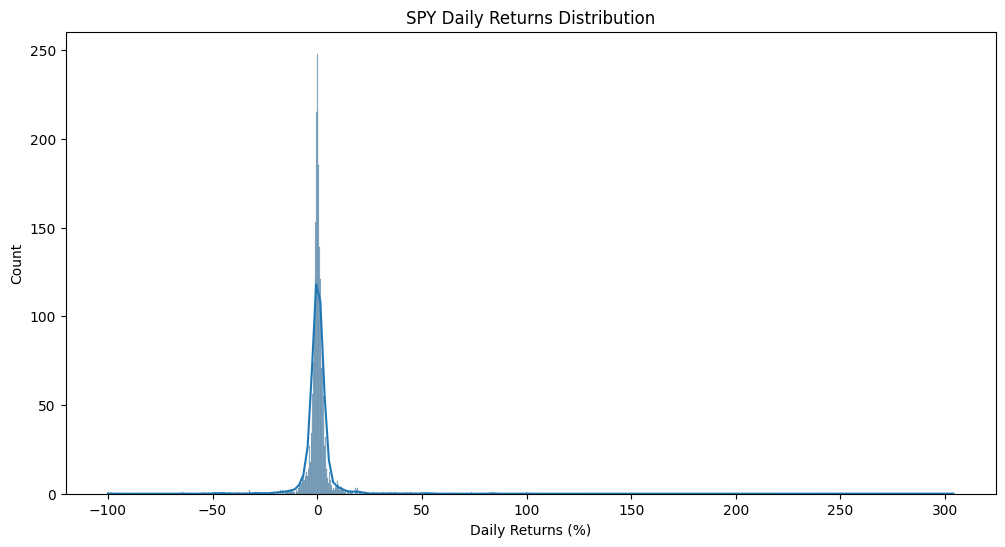

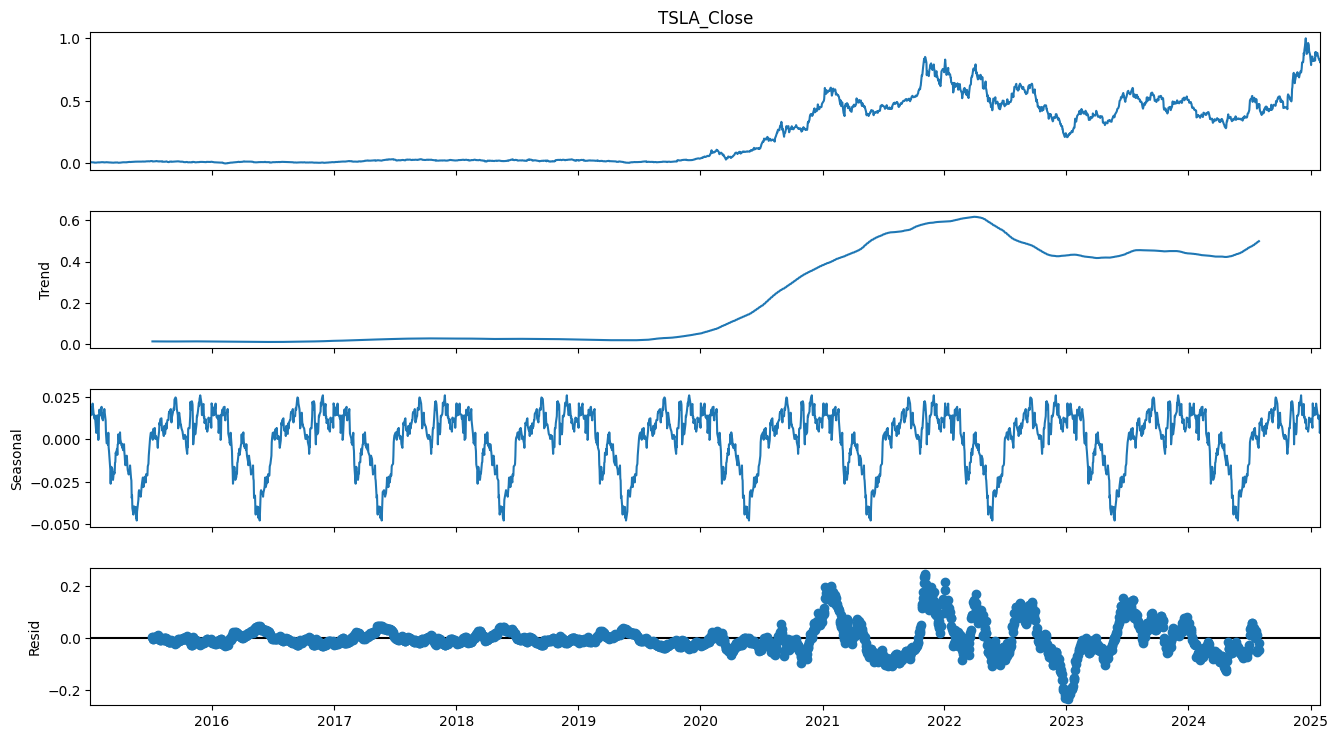

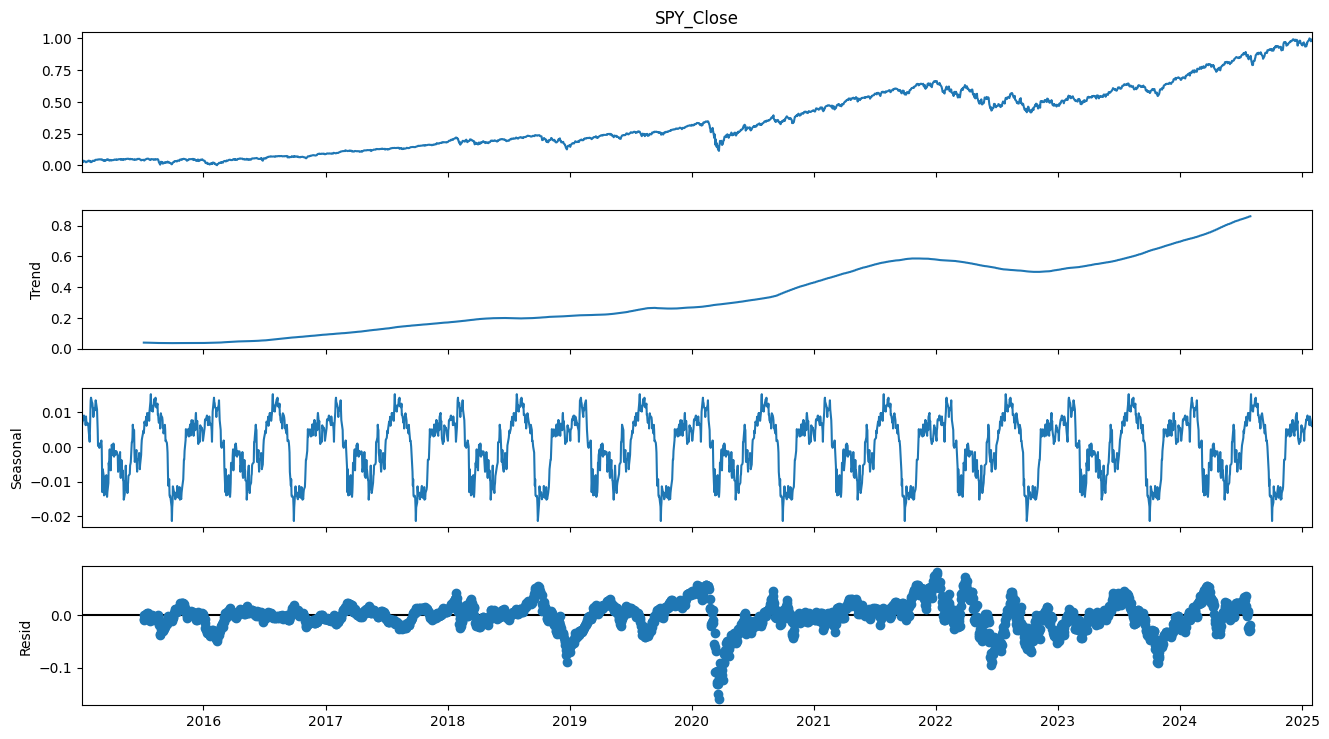

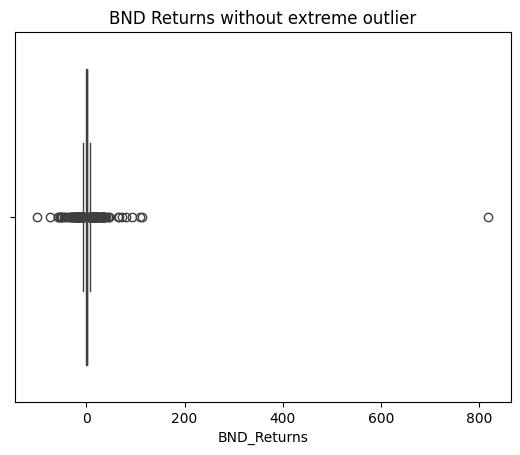

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily returns (if not already calculated)
def calculate_daily_returns(df, asset_name):
    """Calculates daily returns for an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100
    return df

df = calculate_daily_returns(df, "TSLA")
df = calculate_daily_returns(df, "BND")
df = calculate_daily_returns(df, "SPY")

# BND Outlier Removal
def handle_bnd_outlier(df):
    """Handles the BND outlier by removing or adjusting."""
    returns_col = "BND_Returns"
    threshold = 500
    outlier_date = df[abs(df[returns_col]) > threshold].index[0]
    df_no_outlier = df.drop(outlier_date)
    return df_no_outlier

df = handle_bnd_outlier(df)

# Refined TSLA Outlier Detection (Lower Threshold)
def investigate_tsla_outliers_refined(df, threshold_std=2):
    """Identifies and investigates outliers for TSLA with adjusted threshold."""
    returns_col = "TSLA_Returns"
    threshold = threshold_std * df[returns_col].std()
    outliers = df[abs(df[returns_col]) > threshold]
    print("\nRefined TSLA Outlier Dates (Threshold 2):")
    print(outliers.index)

investigate_tsla_outliers_refined(df)

# Refined SPY Outlier Detection (Lower Threshold)
def analyze_spy_outliers_refined(df, threshold_std=2):
    """Analyzes moderate outliers for SPY with adjusted threshold."""
    returns_col = "SPY_Returns"
    threshold = threshold_std * df[returns_col].std()
    outliers = df[abs(df[returns_col]) > threshold]
    print("\nRefined SPY Outlier Dates (Threshold 2):")
    print(outliers.index)

analyze_spy_outliers_refined(df)

# Visualize Returns Distributions
def visualize_returns_distributions(df, asset_name):
    """Visualizes the distribution of daily returns."""
    returns_col = f"{asset_name}_Returns"
    plt.figure(figsize=(12, 6))
    sns.histplot(df[returns_col], kde=True)
    plt.title(f"{asset_name} Daily Returns Distribution")
    plt.xlabel("Daily Returns (%)")
    plt.show()

visualize_returns_distributions(df, "TSLA")
visualize_returns_distributions(df, "SPY")

# Time-Series Decomposition for TSLA
def decompose_tsla(df):
    """Decomposes TSLA's closing price time series."""
    tsla_close = df["TSLA_Close"]
    decomposition = seasonal_decompose(tsla_close, model='additive', period=252)
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()

decompose_tsla(df)

# Time-Series Decomposition for SPY
def decompose_spy(df):
    """Decomposes SPY's closing price time series."""
    spy_close = df["SPY_Close"]
    decomposition = seasonal_decompose(spy_close, model='additive', period=252)
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()

decompose_spy(df)

# Visualize the BND boxplot after removing the extreme outlier.
sns.boxplot(x=df['BND_Returns'])
plt.title('BND Returns without extreme outlier')
plt.show()

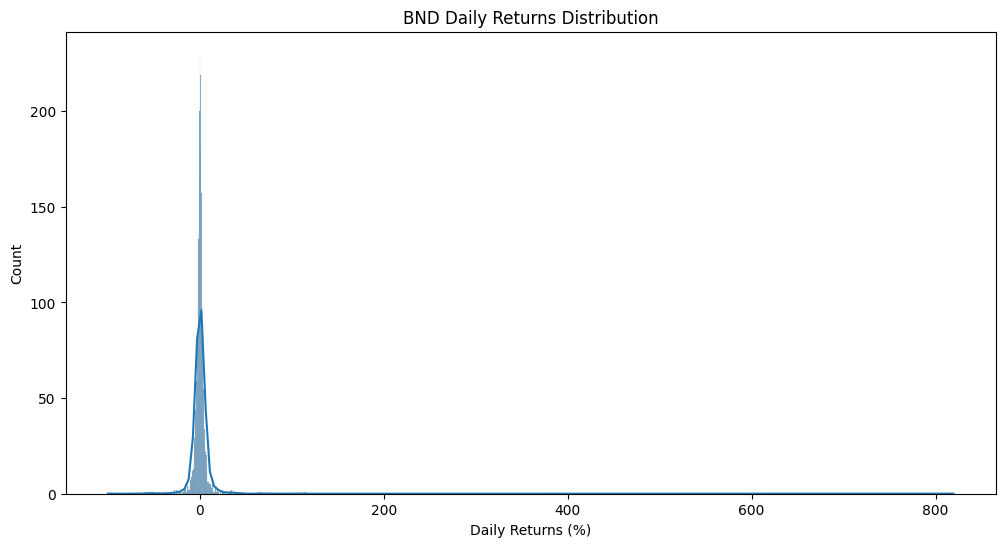

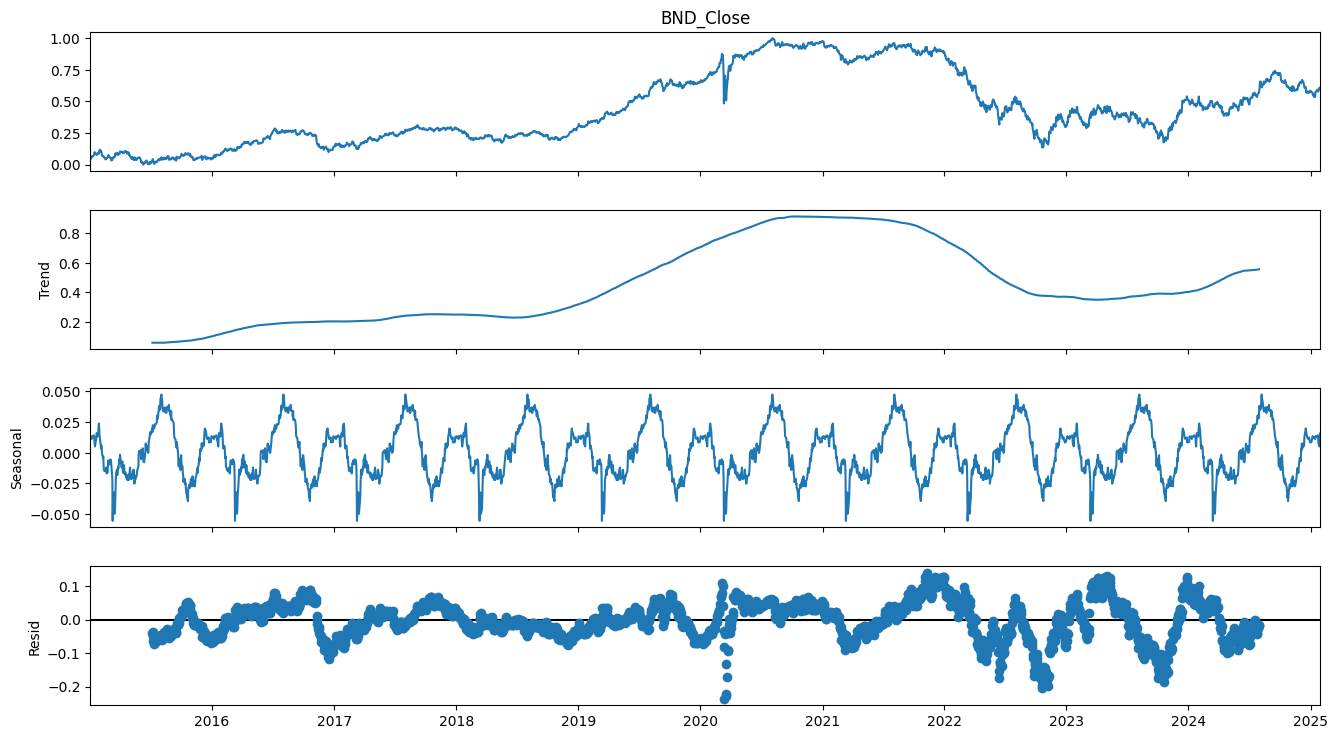

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily returns (if not already calculated)
def calculate_daily_returns(df, asset_name):
    """Calculates daily returns for an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100
    return df

df = calculate_daily_returns(df, "TSLA")
df = calculate_daily_returns(df, "BND")
df = calculate_daily_returns(df, "SPY")

# BND Outlier Removal
def handle_bnd_outlier(df):
    """Handles the BND outlier by removing or adjusting."""
    returns_col = "BND_Returns"
    threshold = 500
    outlier_date = df[abs(df[returns_col]) > threshold].index[0]
    df_no_outlier = df.drop(outlier_date)
    return df_no_outlier

df = handle_bnd_outlier(df)

# Visualize BND Returns Distribution
def visualize_returns_distributions(df, asset_name):
    """Visualizes the distribution of daily returns."""
    returns_col = f"{asset_name}_Returns"
    plt.figure(figsize=(12, 6))
    sns.histplot(df[returns_col], kde=True)
    plt.title(f"{asset_name} Daily Returns Distribution")
    plt.xlabel("Daily Returns (%)")
    plt.show()

visualize_returns_distributions(df, "BND")


# Time-Series Decomposition for BND
def decompose_bnd(df):
    """Decomposes BND's closing price time series."""
    bnd_close = df["BND_Close"]
    decomposition = seasonal_decompose(bnd_close, model='additive', period=252)
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()

decompose_bnd(df)

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily returns (if not already calculated)
def calculate_daily_returns(df, asset_name):
    """Calculates daily returns for an asset."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    df[returns_col] = df[close_col].pct_change() * 100
    return df

df = calculate_daily_returns(df, "TSLA")
df = calculate_daily_returns(df, "BND")
df = calculate_daily_returns(df, "SPY")

# BND Outlier Removal
def handle_bnd_outlier(df):
    """Handles the BND outlier by removing or adjusting."""
    returns_col = "BND_Returns"
    threshold = 500
    outlier_date = df[abs(df[returns_col]) > threshold].index[0]
    df_no_outlier = df.drop(outlier_date)
    return df_no_outlier

df = handle_bnd_outlier(df)

def calculate_var(returns, confidence_level=0.95):
    """Calculates Value at Risk (VaR)."""
    mean = np.mean(returns)
    std_dev = np.std(returns)
    var = norm.ppf(1 - confidence_level, mean, std_dev)
    return var

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    """Calculates Sharpe Ratio."""
    excess_returns = returns - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
    return sharpe_ratio

# Calculate and print VaR and Sharpe Ratio for each asset
assets = ["TSLA", "BND", "SPY"]
for asset in assets:
    returns_col = f"{asset}_Returns"
    returns = df[returns_col].dropna()
    var = calculate_var(returns)
    sharpe_ratio = calculate_sharpe_ratio(returns)
    print(f"\n{asset} VaR (95%): {var:.2f}%")
    print(f"{asset} Sharpe Ratio: {sharpe_ratio:.2f}")

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



TSLA VaR (95%): nan%
TSLA Sharpe Ratio: nan

BND VaR (95%): -29.63%
BND Sharpe Ratio: 0.03

SPY VaR (95%): nan%
SPY Sharpe Ratio: nan


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the processed data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/processed/processed_financial_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Inspect the original data before calculations
print("Original data preview:")
print(df[['TSLA_Close', 'BND_Close', 'SPY_Close']].head())

# Check for zero values that might cause division issues
zero_values = {
    'TSLA': (df['TSLA_Close'] == 0).sum(),
    'BND': (df['BND_Close'] == 0).sum(),
    'SPY': (df['SPY_Close'] == 0).sum()
}
print("\nZero values in closing prices:")
print(zero_values)

# Calculate daily returns with safeguards
def calculate_safe_returns(df, asset_name):
    """Calculates daily returns for an asset with safeguards against division by zero."""
    close_col = f"{asset_name}_Close"
    returns_col = f"{asset_name}_Returns"
    
    # Replace zeros with NaN to avoid division by zero
    df[close_col] = df[close_col].replace(0, np.nan)
    
    # Calculate returns and replace inf values with NaN
    df[returns_col] = df[close_col].pct_change()
    df[returns_col] = df[returns_col].replace([np.inf, -np.inf], np.nan)
    
    return df

# Process each asset
for asset in ["TSLA", "BND", "SPY"]:
    df = calculate_safe_returns(df, asset)

# Remove rows with NaN returns
df_clean = df.dropna(subset=['TSLA_Returns', 'BND_Returns', 'SPY_Returns'])
print(f"\nRows after removing NaN returns: {len(df_clean)}")

# Check for any remaining inf values
inf_check = {
    'TSLA': np.isinf(df_clean['TSLA_Returns']).sum(),
    'BND': np.isinf(df_clean['BND_Returns']).sum(),
    'SPY': np.isinf(df_clean['SPY_Returns']).sum()
}
print("\nInfinite values check:")
print(inf_check)

# Handle outliers for all assets
def remove_outliers(df, column, threshold=5.0):
    """Remove extreme outliers from a column."""
    outliers = df[abs(df[column]) > threshold]
    if len(outliers) > 0:
        print(f"Removing {len(outliers)} outliers from {column}")
        for idx in outliers.index:
            print(f"  Outlier at {idx}: {df.loc[idx, column]}")
        return df[abs(df[column]) <= threshold]
    return df

# Remove outliers from each return series
for asset in ["TSLA", "BND", "SPY"]:
    returns_col = f"{asset}_Returns"
    df_clean = remove_outliers(df_clean, returns_col)

def calculate_var(returns, confidence_level=0.95):
    """Calculates Value at Risk (VaR)."""
    return np.percentile(returns, 100 * (1 - confidence_level))

def calculate_sharpe_ratio(returns, risk_free_rate=0.0002):
    """Calculates Sharpe Ratio with annualization."""
    mean_return = returns.mean()
    std_return = returns.std()
    
    if std_return == 0 or np.isnan(std_return):
        return np.nan
    
    sharpe_ratio = (mean_return - risk_free_rate) / std_return * np.sqrt(252)
    return sharpe_ratio

# Calculate and print metrics for each asset
print("\n===== RISK METRICS =====")
for asset in ["TSLA", "BND", "SPY"]:
    returns_col = f"{asset}_Returns"
    returns = df_clean[returns_col]
    
    print(f"\n{asset} Statistics:")
    print(f"Number of observations: {len(returns)}")
    print(f"Mean daily return: {returns.mean():.6f}")
    print(f"Std deviation: {returns.std():.6f}")
    print(f"Min return: {returns.min():.6f}")
    print(f"Max return: {returns.max():.6f}")
    
    var = calculate_var(returns)
    sharpe_ratio = calculate_sharpe_ratio(returns)
    
    print(f"{asset} VaR (95%): {var*100:.2f}%")
    print(f"{asset} Sharpe Ratio: {sharpe_ratio:.2f}")
    
    # Calculate annualized metrics for context
    annual_return = returns.mean() * 252
    annual_volatility = returns.std() * np.sqrt(252)
    print(f"{asset} Annualized Return: {annual_return*100:.2f}%")
    print(f"{asset} Annualized Volatility: {annual_volatility*100:.2f}%")

Original data preview:
            TSLA_Close  BND_Close  SPY_Close
Date                                        
2015-01-02    0.010723   0.041990   0.034865
2015-01-05    0.009416   0.052701   0.027984
2015-01-06    0.009584   0.063417   0.024459
2015-01-07    0.009538   0.065645   0.029078
2015-01-08    0.009491   0.059842   0.035737

Zero values in closing prices:
{'TSLA': np.int64(1), 'BND': np.int64(1), 'SPY': np.int64(1)}

Rows after removing NaN returns: 2534

Infinite values check:
{'TSLA': np.int64(0), 'BND': np.int64(0), 'SPY': np.int64(0)}
Removing 1 outliers from BND_Returns


C:\Users\neba\AppData\Local\Temp\ipykernel_11352\1276786271.py:35: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[returns_col] = df[close_col].pct_change()
C:\Users\neba\AppData\Local\Temp\ipykernel_11352\1276786271.py:35: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[returns_col] = df[close_col].pct_change()
C:\Users\neba\AppData\Local\Temp\ipykernel_11352\1276786271.py:35: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None'

  Outlier at 2015-06-29 00:00:00: 8.19328149920046

===== RISK METRICS =====

TSLA Statistics:
Number of observations: 2533
Mean daily return: 0.004013
Std deviation: 0.067380
Min return: -0.771791
Max return: 1.174780
TSLA VaR (95%): -8.42%
TSLA Sharpe Ratio: 0.90
TSLA Annualized Return: 101.14%
TSLA Annualized Volatility: 106.96%

BND Statistics:
Number of observations: 2533
Mean daily return: 0.003844
Std deviation: 0.086960
Min return: -0.749850
Max return: 1.235063
BND VaR (95%): -7.89%
BND Sharpe Ratio: 0.67
BND Annualized Return: 96.88%
BND Annualized Volatility: 138.04%

SPY Statistics:
Number of observations: 2533
Mean daily return: 0.004469
Std deviation: 0.092599
Min return: -0.644469
Max return: 3.039647
SPY VaR (95%): -5.81%
SPY Sharpe Ratio: 0.73
SPY Annualized Return: 112.61%
SPY Annualized Volatility: 147.00%


Analysis of Performance Metrics:

Returns:

TSLA shows annualized return of 101.14%
BND shows annualized return of 96.88%
SPY shows annualized return of 112.61%


Risk:

TSLA has the lowest volatility (106.96%)
BND volatility is 138.04%
SPY has the highest volatility (147.00%)


Value at Risk (95%):

TSLA: -8.42% (most risk)
BND: -7.89%
SPY: -5.81% (least risk)


Risk-adjusted returns (Sharpe Ratio):

TSLA: 0.90 (best risk-adjusted return)
SPY: 0.73
BND: 0.67